In [101]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import IncrementalPCA
from sklearn import preprocessing
%matplotlib inline

In [102]:
df= pd.read_csv("data.csv",delimiter=',',na_values='?')

df.shape

(8761, 43)

In [103]:
Y=np.array(df['Overall'])
X = df.drop(columns=['Overall',])

In [104]:
catagories_gk = ['GKDiving','GKReflexes','GKHandling','GKPostioning','GKKicking']
catagories_def = ['Positioning','Interceptions','Marking','SlidingTackle','StandingTackle']
catagories_pass = ['Vision', 'ShortPassing', 'LongPassing', 'BallControl']
catagories = [catagories_gk, catagories_def, catagories_pass]

In [105]:
labels = df.Overall
true_k = len(np.unique(labels))

In [106]:
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,
                verbose=True)

In [107]:
print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=27, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=True)
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 19942251.762850247
start iteration
done sorting
end inner loop
Iteration 1, inertia 18655952.930092324
start iteration
done sorting
end inner loop
Iteration 2, inertia 18280160.980448492
start iteration
done sorting
end inner loop
Iteration 3, inertia 18118269.589122865
start iteration
done sorting
end inner loop
Iteration 4, inertia 18032689.920054592
start iteration
done sorting
end inner loop
Iteration 5, inertia 17968693.278866816
start iteration
done sorting
end inner loop
Iteration 6, inertia 17921709.964842673
start iteration
done sorting
end inner loop
Iteration 7, inertia 17887262.1806533
start iteration
done sorting
end inner loop
Iteration 8, inertia 17864185.367047198
star

In [108]:
dfnm = df[(df.Potential >=85)]

In [109]:
dfnm = dfnm.transform(lambda x: (x - x.mean()) / x.std())

In [110]:
print(dfnm)

           Age   Overall  Potential     Value      Wage  \
0     0.146389 -0.072857  -0.930237 -1.328278 -1.009042   
226   0.638012  1.317036   0.984887  2.206657  2.635861   
227   1.621257  1.317036   0.506106  1.570877  1.825883   
228   1.375446  0.795826  -0.930237  0.553630  1.710172   
229   0.146389  0.448353   1.463668  0.528199 -0.800762   
230   0.146389  0.448353   0.984887  0.451905  0.900193   
234  -0.345234 -0.072857  -0.451456 -0.311030 -0.175921   
235  -0.099422 -0.072857  -0.930237 -0.463617 -0.025497   
236  -0.099422 -0.072857  -0.930237 -0.311030 -0.256919   
237   0.146389 -0.072857  -0.930237 -0.336462  0.495204   
241  -0.591045 -0.246594   0.506106 -0.336462 -0.731335   
242  -0.345234 -0.246594   0.027325 -0.361893 -0.037068   
248  -1.082668 -0.420331  -0.451456 -0.692498 -0.442057   
249  -0.836856 -0.420331  -0.451456 -0.539911 -0.870189   
254  -0.099422 -0.420331  -0.451456 -0.565342 -0.708193   
262  -0.591045 -0.594067  -0.930237 -0.768792 -0.800762 

In [111]:
dfnm = dfnm.fillna(dfnm.mean())

In [112]:
x = dfnm.values 
min_max_scaler = preprocessing.MinMaxScaler()  
x_scaled = min_max_scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [113]:
pca = sklearnPCA(n_components=2) #reduce 43 dimensions into two
transformed = pd.DataFrame(pca.fit_transform(X_norm))

In [114]:
cluster_range = range( 1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( transformed )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
print(clusters_df)

   num_clusters  cluster_errors
0             1      550.399151
1             2      250.157094
2             3      106.257289
3             4       66.288213
4             5       46.655854
5             6       37.786010
6             7       32.760578
7             8       28.836968
8             9       24.869215
9            10       22.272628


Text(0, 0.5, 'Sum of squared errors')

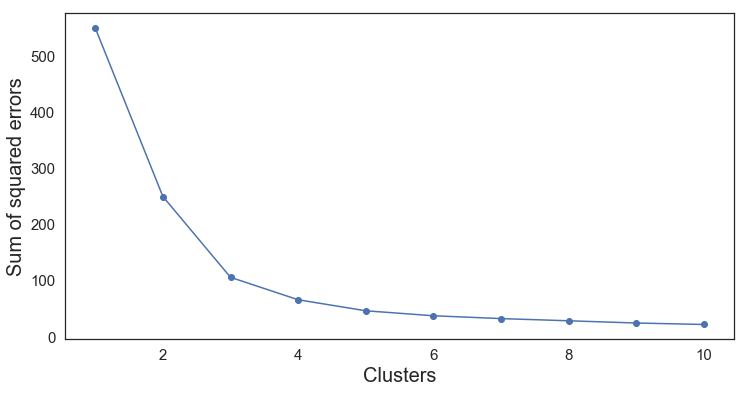

In [115]:
sns.set(style="white")
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.tick_params(labelsize=15)

plt.xlabel("Clusters", fontsize=20)
plt.ylabel("Sum of squared errors", fontsize=20)

In [116]:
# Number of clusters
kmeans = KMeans(n_clusters=5)
# Fitting the input data
kmeans = kmeans.fit(transformed)
# Getting the cluster labels
labels = kmeans.predict(transformed)
# Centroid values
C = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

In [117]:
transformed['cluster'] = clusters
transformed.columns = ['x','y','cluster']
print(transformed[0:10])

          x         y  cluster
0 -0.651493  0.261624        4
1 -0.885824 -0.464887        0
2 -0.460628 -0.752521        0
3 -0.741856  0.530492        4
4 -0.729440 -0.242204        0
5 -0.756083  0.132926        4
6 -0.537453  0.057886        4
7  0.019579  0.886496        2
8 -0.292353 -0.776661        3
9 -0.516546  0.393233        4


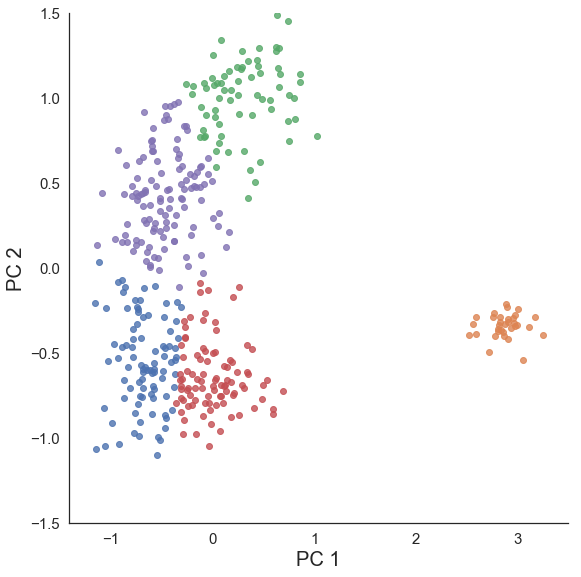

In [125]:

sns.set(style="white")
ax = sns.lmplot(x="x", y="y",hue='cluster', data=transformed, legend=False,
                   fit_reg=False, height =8, )



#ax._legend.set_title(prop={fontsize:'15'})
ax.set(ylim=(-1.5, 1.5))
plt.tick_params(labelsize=15)
#plt.setp(ax.get_legend().get_title(), fontsize='15')
plt.xlabel("PC 1", fontsize=20)
plt.ylabel("PC 2", fontsize=20)
plt.show(kmeans.cluster_centers_.all)
plt.show()
# ax.savefig("newc_man_kmeans.jpg")